# Exercício 4
Compare os modelos de Regressão Logistica, AD, RF, SVM, Naive Bayes, e kNN, usando a métrica AUC ou outras métricas de interesse. Monte uma tabela com os resultados.

In [38]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from mlxtend.plotting import plot_confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# dataset

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [40]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

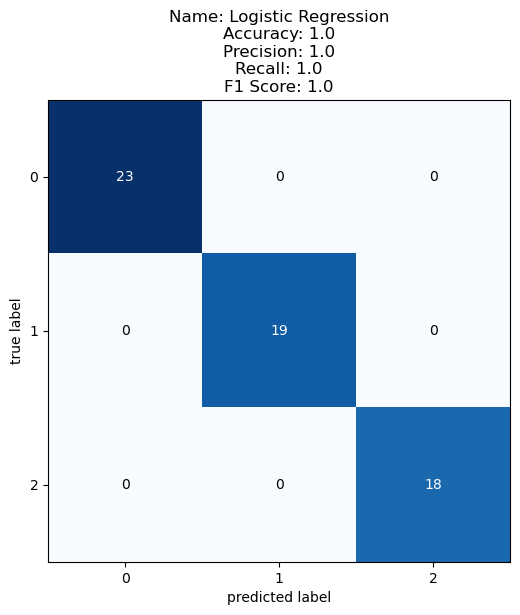

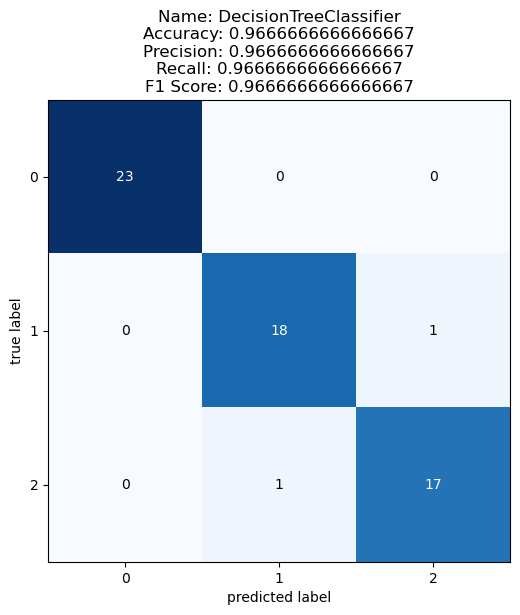

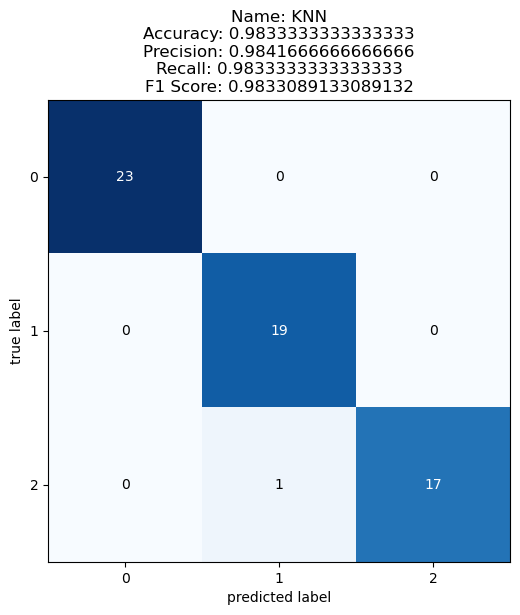

In [42]:
# Models

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42, max_depth=7),
    'KNN': KNeighborsClassifier(),
}

table_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    table_results.append([name, accuracy, precision, recall, fscore])

    title = (f'Name: {name}\n'
             f'Accuracy: {accuracy}\n'
             f'Precision: {precision}\n'
             f'Recall: {recall}\n'
             f'F1 Score: {fscore}')

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6))
    plt.title(title)
    plt.show()
    print('\n\n')

In [43]:
# Results

df_results = pd.DataFrame(table_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,DecisionTreeClassifier,0.966667,0.966667,0.966667,0.966667
2,KNN,0.983333,0.984167,0.983333,0.983309
